In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('./ml_files/Ecommerce Customers.txt')
df.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [8]:
# preprocessing

In [9]:
# EDA

In [11]:
df['Yearly Amount Spent'].mean()

499.3140382585909

In [13]:
df['Length of Membership'].max()

6.922689335035808

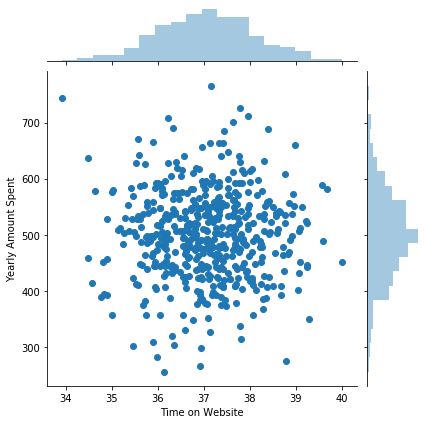

In [15]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=df)

In [17]:
df['Time on Website'].corr(df['Yearly Amount Spent'])

-0.0026408446721589733

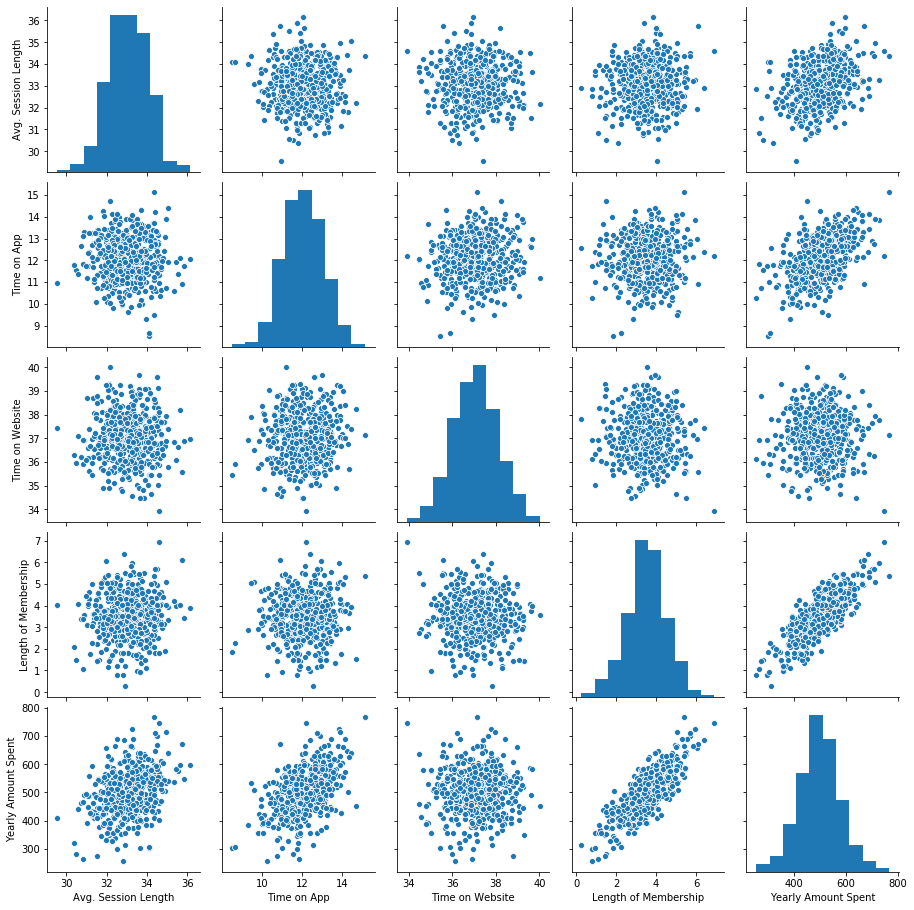

In [18]:
sns.pairplot(df)

In [19]:
df['Length of Membership'].corr(df['Yearly Amount Spent'])

0.8090835682475812

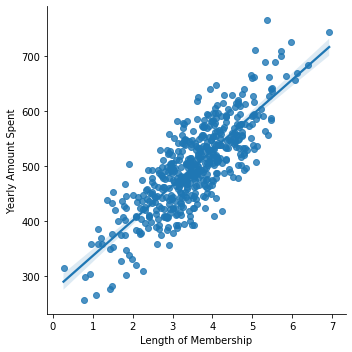

In [20]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=df)

In [21]:
# x data, y data

In [22]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [24]:
y = df['Yearly Amount Spent']
x = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [ ]:
# train, test split

In [27]:
# x_train = x[:400]   # model train
# y_train = y[:400]

# x_test = x[400:]    # model test
# y_test = y[400:]

In [55]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=111)

In [56]:
# Linear Regression Algorithm

In [57]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [58]:
# Algorithm Train

In [59]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
# model prediction

In [34]:
predictions = lr.predict(x_test)  
predictions[:10]   # x_test에 대한 lr의 예측값..

array([656.53182746, 495.4050683 , 522.99217803, 615.38255148,
       497.4964396 , 500.76291281, 425.20749828, 419.01697905,
       481.74527484, 518.05632706])

In [35]:
# x_test의 실제값은 y_test
y_test

400    663.074818
401    506.375867
402    528.419330
403    632.123588
404    488.270298
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 100, dtype: float64

In [ ]:
# evaluation
# => mean_absolute_error, mean_squared_error, root_mean_squared_error, r_square

In [47]:
print('RMSE:', np.sqrt(np.mean((predictions - y_test.values)**2)))
print('MSE:', np.mean((predictions - y_test.values)**2))
print('MAE:', np.mean(abs(predictions - y_test.values)))

RMSE: 10.6075157496988
MSE: 112.5193903801081
MAE: 8.222577352952012


In [50]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMAE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 8.222577352952012
MSE: 112.5193903801081
RMAE: 10.6075157496988


In [54]:
lr.score(x_test, y_test)

0.9821901197214018